In [37]:
# ============= 1. CARGA DE BIBLIOTECAS Y DATOS =============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import time

# Carga de datos
data = pd.read_csv('/content/TCGA_InfoWithGrade.csv')
X = data.drop('Grade', axis=1)
y = data['Grade']

=== FORMA DEL DATASET ===
Filas: 839, Columnas: 24

=== DISTRIBUCIÓN DE CLASES ===
Grade
0    487
1    352
Name: count, dtype: int64

Ratio de desbalanceo: 1.38:1


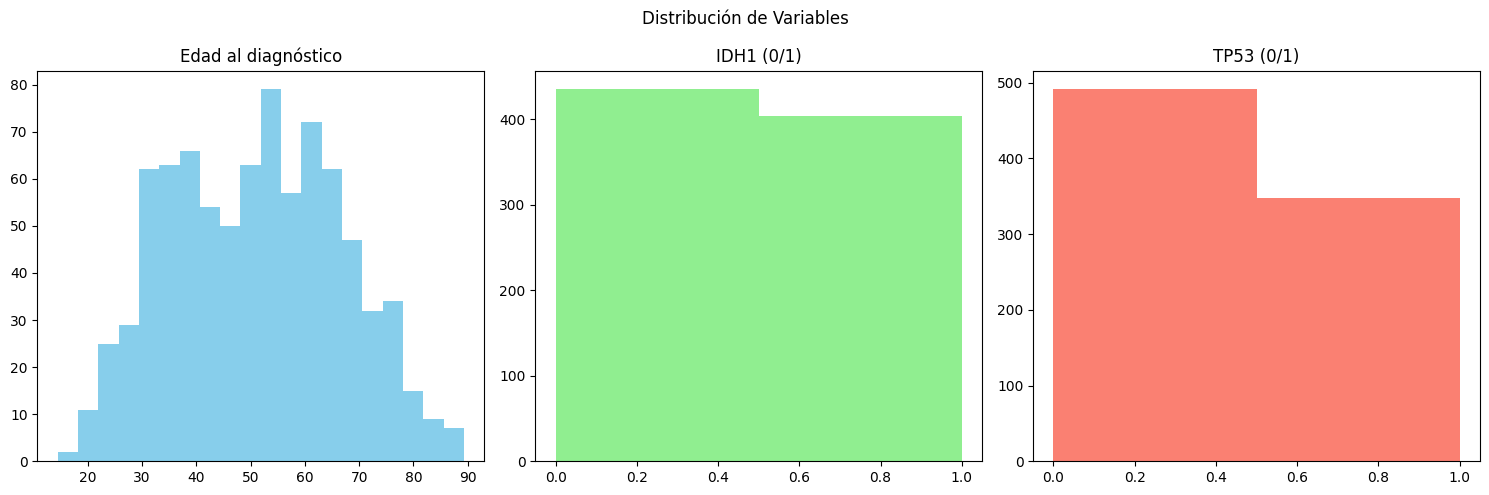


=== DESCRIPCIÓN ESTADÍSTICA DEL DATASET ===

            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.492978    0.438149    0.374140    0.340309   

<ipython-input-38-e1067e1a1546>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Age_at_diagnosis', data=data, palette='Set2')
<ipython-input-38-e1067e1a1546>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='IDH1', data=data, palette='Set2')
<ipython-input-38-e1067e1a1546>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='TP53', data=data, palette='Set2')


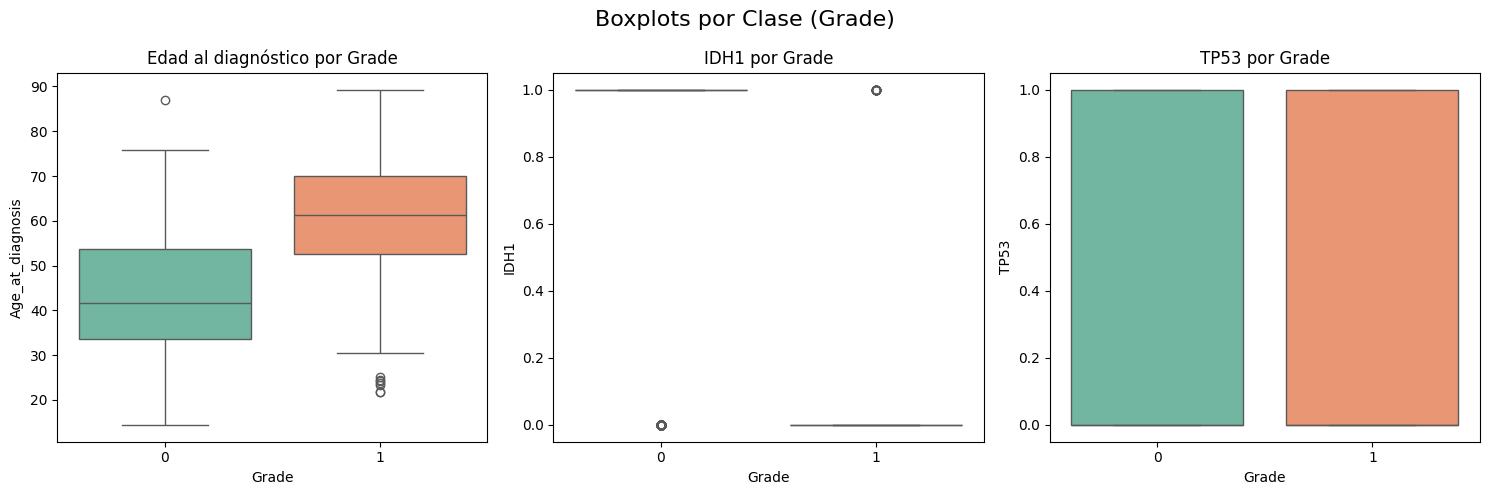

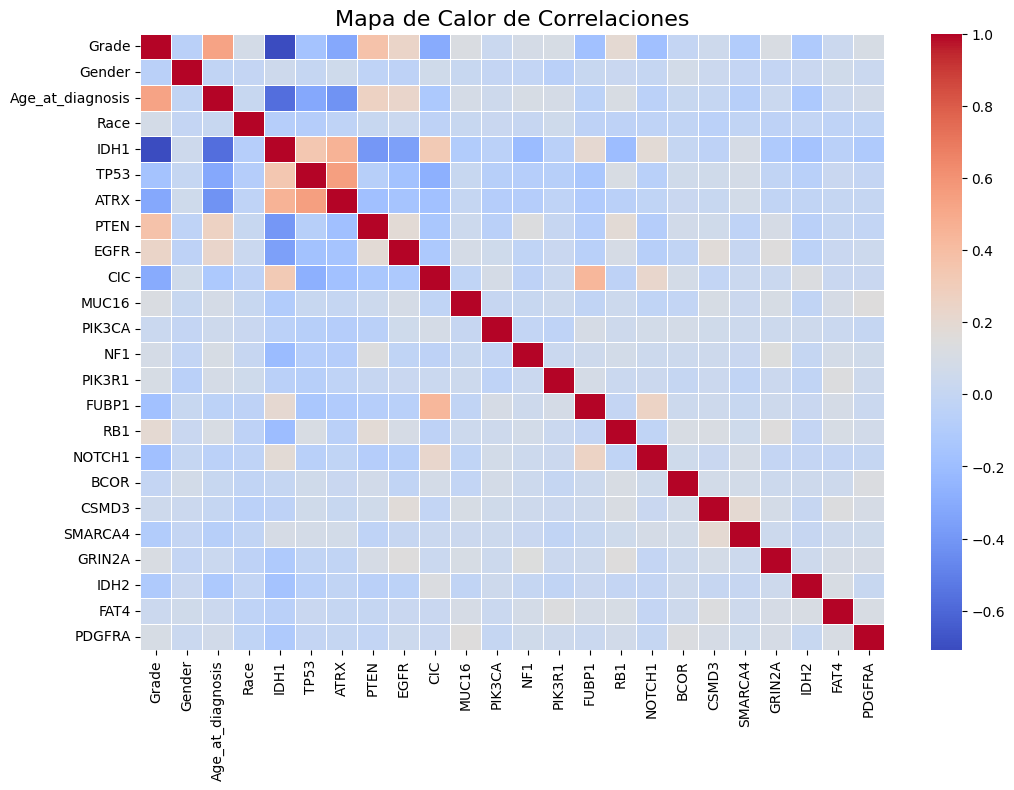

In [38]:
# ============= 2. ANÁLISIS EXPLORATORIO (EDA) =============
print("=== FORMA DEL DATASET ===")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")

print("\n=== DISTRIBUCIÓN DE CLASES ===")
class_dist = data['Grade'].value_counts()
print(class_dist)
print(f"\nRatio de desbalanceo: {class_dist[0]/class_dist[1]:.2f}:1")

plt.figure(figsize=(15, 5))
plt.suptitle("Distribución de Variables")

plt.subplot(1, 3, 1)
plt.hist(data['Age_at_diagnosis'], bins=20, color='skyblue')
plt.title('Edad al diagnóstico')

plt.subplot(1, 3, 2)
plt.hist(data['IDH1'], bins=2, color='lightgreen')
plt.title('IDH1 (0/1)')

plt.subplot(1, 3, 3)
plt.hist(data['TP53'], bins=2, color='salmon')
plt.title('TP53 (0/1)')
plt.tight_layout()
plt.show()

print("\n=== DESCRIPCIÓN ESTADÍSTICA DEL DATASET ===\n")
print(data.describe())

print("\n=== INFORMACIÓN DEL DATASET ===\n")
print(data.info())

plt.figure(figsize=(15, 5))
plt.suptitle("Boxplots por Clase (Grade)", fontsize=16)

plt.subplot(1, 3, 1)
sns.boxplot(x='Grade', y='Age_at_diagnosis', data=data, palette='Set2')
plt.title('Edad al diagnóstico por Grade')

plt.subplot(1, 3, 2)
sns.boxplot(x='Grade', y='IDH1', data=data, palette='Set2')
plt.title('IDH1 por Grade')

plt.subplot(1, 3, 3)
sns.boxplot(x='Grade', y='TP53', data=data, palette='Set2')
plt.title('TP53 por Grade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

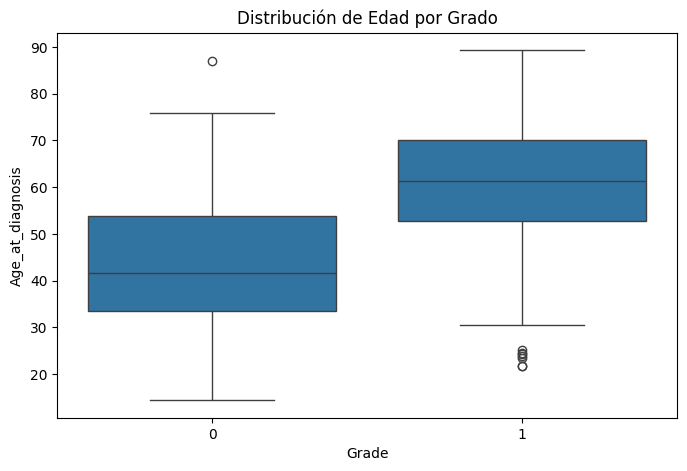

In [16]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Grade', y='Age_at_diagnosis', data=data)
plt.title('Distribución de Edad por Grado')
plt.show()


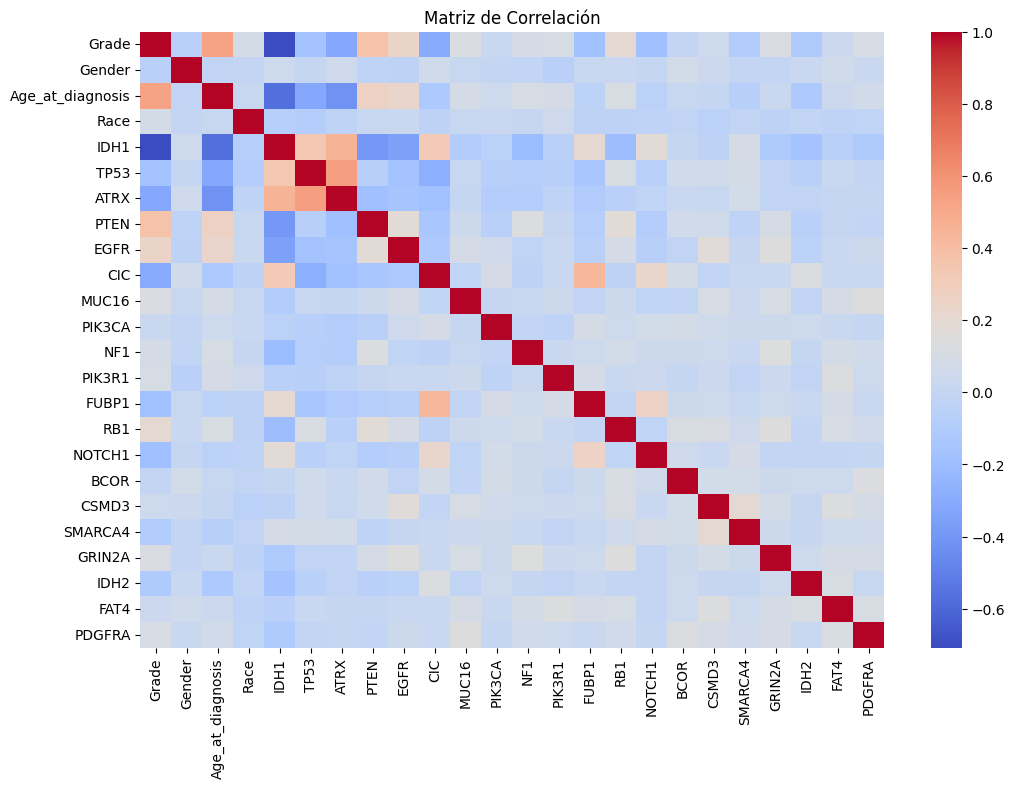

In [17]:
# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()

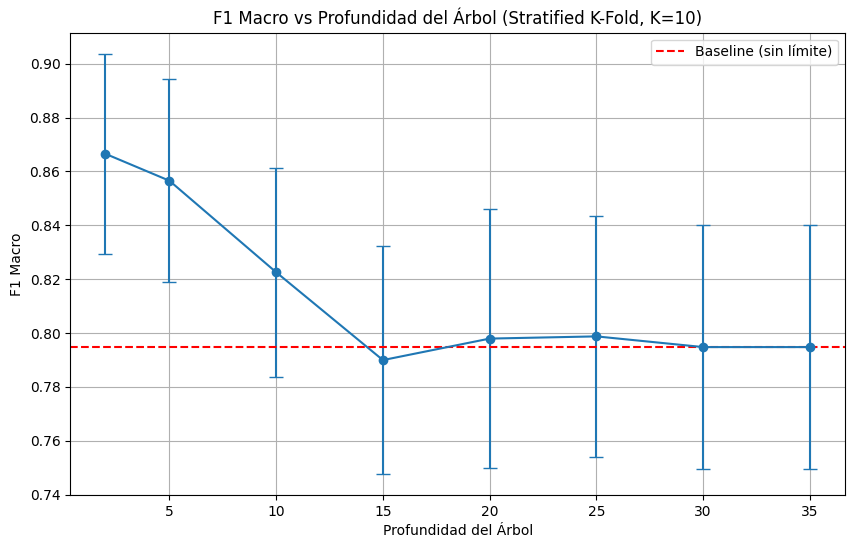

In [39]:
# ============= 3. GRÁFICA DE ERRORES =============
depths = [2, 5, 10, 15, 20, 25, 30, None]
f1_scores = []
f1_stds = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=7)
    scores = cross_val_score(clf, X, y, cv=skf, scoring='f1_macro')
    f1_scores.append(scores.mean())
    f1_stds.append(scores.std())

plt.figure(figsize=(10, 6))
plt.errorbar([d if d is not None else 35 for d in depths], f1_scores, yerr=f1_stds, fmt='-o', capsize=5)
plt.axhline(y=f1_scores[-1], color='r', linestyle='--', label='Baseline (sin límite)')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('F1 Macro')
plt.title('F1 Macro vs Profundidad del Árbol (Stratified K-Fold, K=10)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# ============= 4. OPTIMIZACIÓN DE HIPERPARÁMETROS =============

## 4. RandomizedSearchCV (f1_macro)

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 21))
}

rs_f1 = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_distributions=param_dist,
    n_iter=5,
    scoring="f1_macro",
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=3),
    n_jobs=-1
)

rs_f1.fit(X, y)
print("Mejores hiperparámetros:", rs_f1.best_params_)
print("Mejor f1_macro:", rs_f1.best_score_)

Mejores hiperparámetros: {'min_samples_split': 16, 'max_depth': 34, 'criterion': 'entropy'}
Mejor f1_macro: 0.8341050769919777


5 GridSearchCV (f1_macro)

In [46]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 21))
}

gs_f1 = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring="f1_macro",
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=3),
    n_jobs=-1
)

gs_f1.fit(X, y)
print("Mejores hiperparámetros:", gs_f1.best_params_)
print("Mejor f1_macro:", gs_f1.best_score_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
Mejor f1_macro: 0.865107607095253


6 RandomizedSearchCV (accuracy)

In [47]:
rs_acc = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_distributions=param_dist,
    n_iter=5,
    scoring="accuracy",
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=3),
    n_jobs=-1
)

rs_acc.fit(X, y)
print("Mejores hiperparámetros (accuracy):", rs_acc.best_params_)
print("Mejor accuracy:", rs_acc.best_score_)

Mejores hiperparámetros (accuracy): {'min_samples_split': 4, 'max_depth': 8, 'criterion': 'entropy'}
Mejor accuracy: 0.8557085484796328


7 GridSearchCV (accuracy)

In [48]:
gs_acc = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring="accuracy",
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=3),
    n_jobs=-1
)

gs_acc.fit(X, y)
print("Mejores hiperparámetros (accuracy):", gs_acc.best_params_)
print("Mejor accuracy:", gs_acc.best_score_)

Mejores hiperparámetros (accuracy): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
Mejor accuracy: 0.8664515203671831


## 8. Actividad de reflexión y análisis

**¿Cuál método encontró mejores hiperparámetros?**  
La verdad, GridSearchCV sí encontró mejores combinaciones. Como prueba todas, es más fácil que le atine a la mejor. En cambio, RandomizedSearchCV solo prueba algunas, así que depende más de la suerte.

**¿Cuál fue más costoso computacionalmente?**  
Definitivamente GridSearchCV. Tardó bastante más porque prueba todo. Randomized fue mucho más rápido.

**¿Los resultados en F1 Macro fueron distintos en ambos métodos de optimización? ¿Por qué?**  
Sí hubo diferencia. GridSearch dio mejores resultados porque busca de forma más completa. Randomized puede quedarse corto porque solo prueba unas cuantas combinaciones al azar.

**¿Los resultados en Accuracy fueron distintos en ambos métodos de optimización? ¿Por qué?**  
También hubo diferencias pero no tan grandes como con F1 Macro. Igual, GridSearch fue un poquito mejor, pero los dos dieron resultados decentes.

**¿Los valores de hiperparámetros fueron iguales en Accuracy y F1 Macro?**  
No, salieron diferentes. Tiene sentido porque Accuracy solo ve el total correcto, pero F1 Macro se fija más en cómo se comporta en cada clase, entonces el modelo se ajusta distinto.
